In [2]:
%matplotlib inline
%autosave 5

Autosaving every 5 seconds


In [3]:
# necessary modules -------------------------------------------------------------------------------------
import pyfesom2 as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import time
from datetime import date

#import sys
#sys.path.append('home/ollie/mozeisin/SkillMetrics')

import cartopy.crs as ccrs
#import pangaeapy.pandataset as pd

# own py_recom modules ----------------------------------------------------------------------
#!jupyter nbconvert --to=python plot_Taylor_normalized.ipynb

#from load_interp_WOA_python3 import WOAdata
from plot_Taylor_normalized import plt_Taylor_norm

In [4]:
# After changing these parameters here, save the notebook and clear the output. 
# Then run this cell and the cells with the desired parameters.

# run specification -------------------------------------------------------------------------------------
runid      =  'fesom'
layerwise    = False
resultpath = '/work/ollie/mozeisin/results/f2r1.2/tep1' 
meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'

# period of analysis 
first_year = 1950
last_year  = 1960
    
years = [first_year, last_year]

# specification of analysis ------------------------------------------------------------------------------------
depth = 5
layerwise = False
mapproj = 'pc'
#Map projection. Options are Mercator (merc), Plate Carree (pc),
#North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
#Robinson projection is quite time consuming.

# export of analysis ------------------------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")

savepath = '/home/ollie/mozeisin/evaluation/mo_files/tep1/'
savefig = False
htmlname     =  'tep1' + today +'.html'
htmlpath = '/home/ollie/mozeisin/evaluation/mo_files/html/'
    

In [5]:
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)

# Chlorophyll

[NbConvertApp] Converting notebook Chlsurf_OCCCI_Comparison_python3.ipynb to python
[NbConvertApp] Writing 15929 bytes to Chlsurf_OCCCI_Comparison_python3.py
***
Using upper 1 layers to depth -5.0 m for surface FESOM data!
***
***
FESOM data in not converted...
***

Chl.a
OCCCI min = 0.0082, max = 53.4243
FESOM min = 0.0000, max = 3.8768 (Mean over 0 to -5.0 m)

log10(Chl.a)
OCCCI min = -2.0880, max = 1.7277
FESOM min = -4.6311, max = 0.5885 (Mean over 0 to -5.0 m)


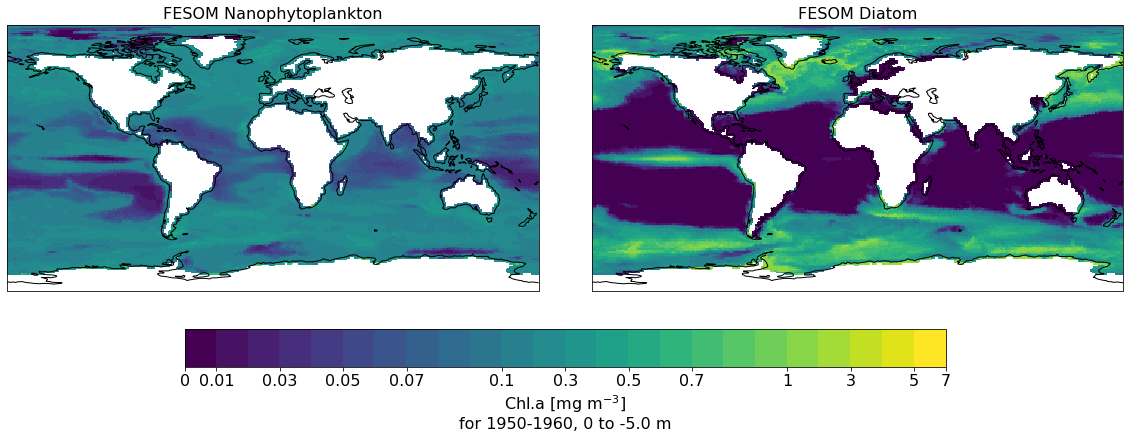

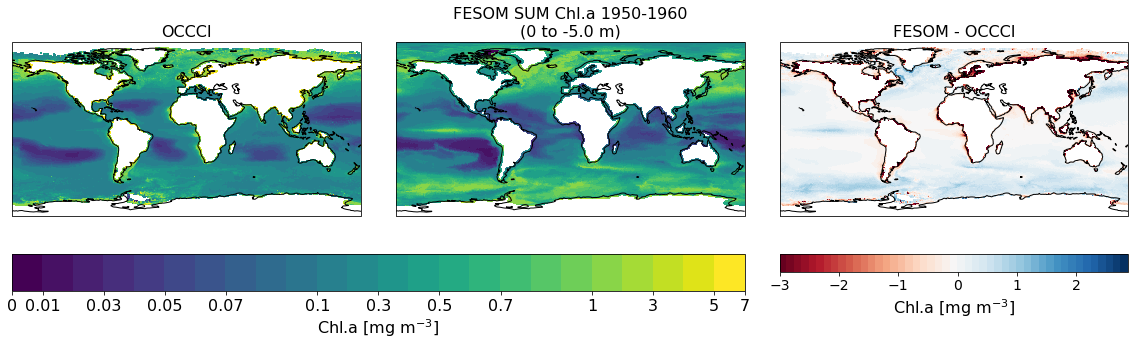


Statistics for log10 surface Chlorophyll

Original Taylor stats:
SDEV pred: 0.46214, ref: 0.44571
CRMS pred: 0.44043, ref: 0.00000
CORRCOEF: 0.52978

Normalized Taylor stats:
SDEV pred: 1.03686, ref: 1.00000
CRMS pred: 0.98816, ref: 0.00000
CORRCOEF: 0.52978
Adjust axis max to 1.5


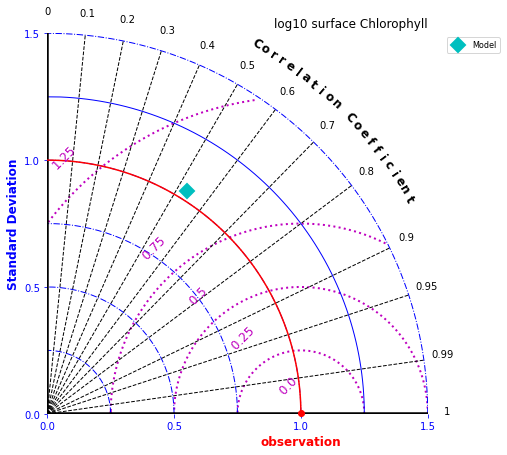

In [16]:
!jupyter nbconvert --to=python Chlsurf_OCCCI_Comparison_python3.ipynb
from Chlsurf_OCCCI_Comparison_python3 import Chlsurf_OCCCI_comp

# OCCCI   
matfileChlsurf           = '/work/ollie/projects/MarESys/evaluation/climatology_annual_chl_1deg_OCCCI_2012_2015.mat'

# analyze only last 10 years
test = Chlsurf_OCCCI_comp(runid,resultpath,savepath,meshpath,matfileChlsurf,
                          last_year-10,last_year,
                          #first_year,last_year,
                          mapproj=mapproj,savefig=savefig)


# Intracellular carbon

Model depth: 5.0


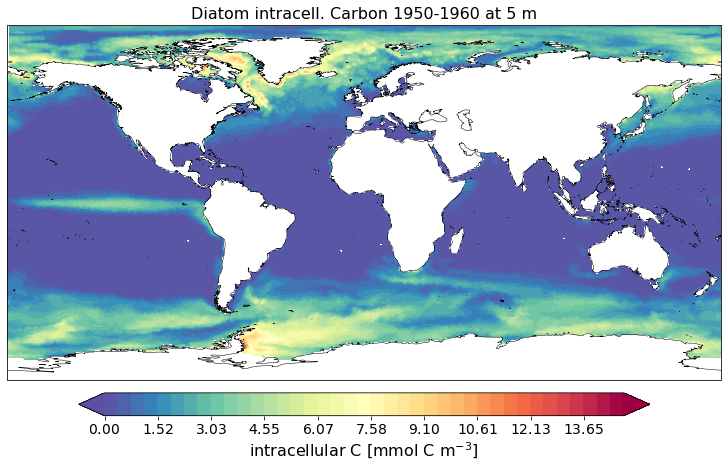

In [6]:
# Diatom carbon

NCfesom = resultpath + '/DiaC.fesom.1948.nc'
#!ncdump -h $NCfesom

label='Diatom intracell. Carbon {0}-{1} at {2} m'.format(years[0],years[1],depth)
units = 'intracellular C [mmol C m$^{-3}$]'

DiaC = pf.get_data(resultpath, "DiaC", years=1950, mesh=mesh, runid=runid, how="mean", depth=depth)
fig = pf.plot(mesh, DiaC, mapproj = mapproj, units=units, titles=label)


Model depth: 5.0


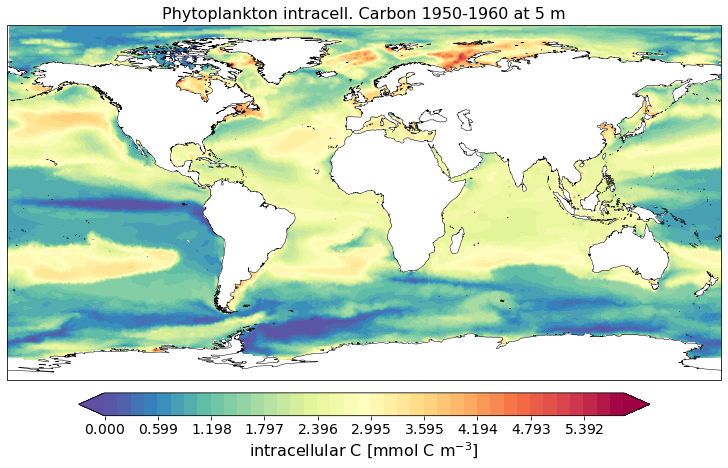

In [7]:
# Phytplankton carbon

NCfesom = resultpath + '/PhyC.fesom.1948.nc'
#!ncdump -h $NCfesom

label='Phytoplankton intracell. Carbon {0}-{1} at {2} m'.format(years[0],years[1],depth)
units = 'intracellular C [mmol C m$^{-3}$]'

PhyC = pf.get_data(resultpath, "PhyC", years=1950, mesh=mesh, runid=runid, how="mean", depth = depth)
fig = pf.plot(mesh, PhyC, mapproj = mapproj, units=units, titles=label)


# PCHO

Model depth: 5.0


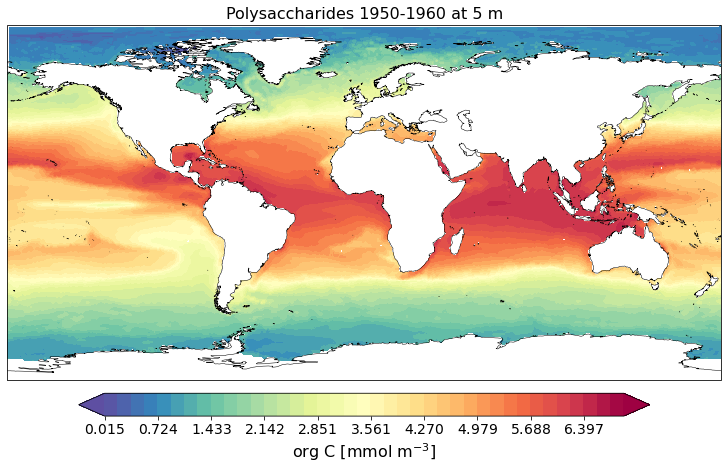

In [29]:
units = 'org C [mmol m$^{-3}$]'
label='Polysaccharides {0}-{1} at {2} m'.format(years[0],years[1],depth)

PCHO = pf.get_data(resultpath, "PCHO", years, mesh, runid=runid, how="mean", compute=True, depth=depth)

fig = pf.plot(mesh, PCHO, mapproj = mapproj, units=units, titles=label)

Plotting transect at lat -80 to 83, lon -60 to 10


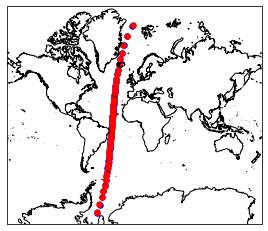

In [45]:
# Atlantic transect ------------------------------------------------------------------------------
lon_start = -60
lat_start = -80
lon_end = 10
lat_end = 83
npoints   = 50
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

pf.plot_transect_map(lonlat, mesh)

print('Plotting transect at lat {0} to {1}, lon {2} to {3}'.format(lat_start,lat_end,lon_start,lon_end))
#pf.plot_transect_map(lonlat, mesh)

Depth is None, 3d field will be returned
PCHO loaded for years 1950-1960
min = 2.2299680230664315e-16, max = 6.943495273590088, mean = 0.5908873677253723 [mmol/m3]


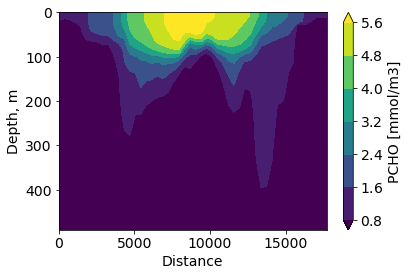

In [46]:
# load data
PCHOall = pf.get_data(resultpath, "PCHO", years=years, mesh=mesh, runid=runid, how="mean")#, depth=depth)

#print(np.shape(PCHO))

print('PCHO loaded for years {0}-{1}\nmin = {3}, max = {4}, mean = {5} [mmol/m3]'.format(
    years[0],years[1],depth, np.nanmin(PCHOall), np.nanmax(PCHOall), np.nanmean(PCHOall)))

# extract transect data
dist, tfPCHO = pf.get_transect(PCHOall,mesh,lonlat)

pf.plot_xyz(mesh, 
            tfPCHO,
            dist,
            maxdepth=600,
            ncols=1,
            xlabel='Distance',
            label='PCHO [mmol/m3]',
            #levels=np.linspace(-2,2, 41),
            cmap='viridis',
            figsize=(15, 6))

# TEP

Model depth: 5.0


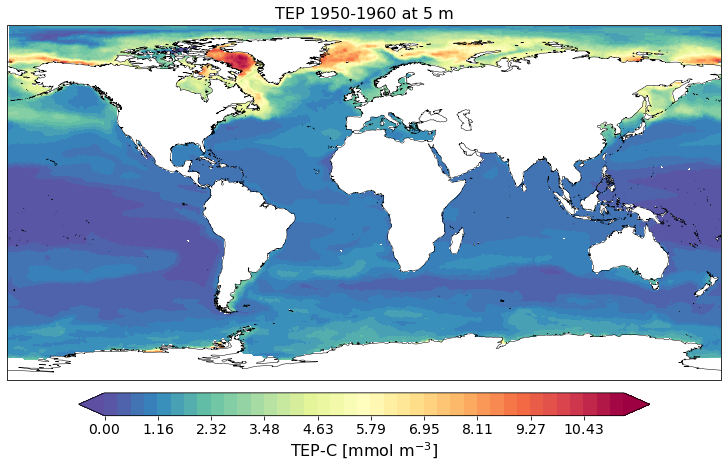

In [12]:
label='TEP {0}-{1} at {2} m'.format(years[0],years[1],depth)
units = 'TEP-C [mmol m$^{-3}$]'

TEP = pf.get_data(resultpath, "TEP", years, mesh, runid=runid, how="mean", compute=True, depth=depth)
fig = pf.plot(mesh, TEP, mapproj = mapproj, units=units, titles=label)

Depth is None, 3d field will be returned
TEP loaded for years 1950-1960
min = 2.2299680230664315e-16, max = 12.822135925292969, mean = 0.2098304033279419 [mmol/m3]
Plotting transect at lat -80 to 83, lon -60 to 10


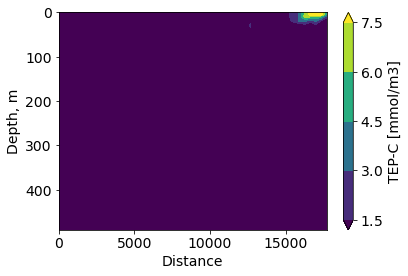

In [42]:
# Atlantic Transect

# get data
TEPall = pf.get_data(resultpath, "TEP", years=years, mesh=mesh, runid=runid, how="mean")#, depth=depth)

#print(np.shape(TEPall))

print('TEP loaded for years {0}-{1}\nmin = {3}, max = {4}, mean = {5} [mmol/m3]'.format(
    years[0],years[1],depth, np.nanmin(TEPall), np.nanmax(TEPall), np.nanmean(TEPall)))

print('Plotting transect at lat {0} to {1}, lon {2} to {3}'.format(lat_start,lat_end,lon_start,lon_end))
#pf.plot_transect_map(lonlat, mesh)

# extract transect data
dist, tfTEP = pf.get_transect(TEPall,mesh,lonlat)

pf.plot_xyz(mesh, 
            tfTEP,
            dist,
            maxdepth=600,
            ncols=1,
            xlabel='Distance',
            label='TEP-C [mmol/m3]',
            #levels=np.linspace(-2,2, 41),
            cmap='viridis',
            figsize=(15, 6))

# Detritus Carbon

Model depth: 0.0


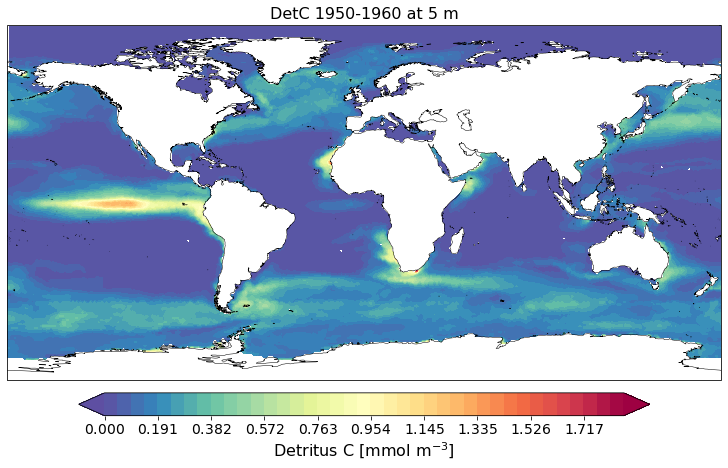

In [23]:
NCfesom = resultpath + '/DetC.fesom.1948.nc'
#!ncdump -h $NCfesom

label='DetC {0}-{1} at {2} m'.format(years[0],years[1],depth)
units = 'Detritus C [mmol m$^{-3}$]'

DetC = pf.get_data(resultpath, "DetC", years, mesh, runid=runid, how="mean", compute=True, depth=depth)
fig = pf.plot(mesh, DetC, mapproj = mapproj, units=units, titles=label)

# extracellular carbon

In [24]:
NCfesom = resultpath + '/EOC.fesom.1948.nc'
!ncdump -h $NCfesom

#label='TEP {0}-{1} at {2} m'.format(years[0],years[1],depth)
#units = 'TEP-C [mmol m$^{-3}$]'
#TEP = pf.get_data(resultpath, "EOC", years, mesh, runid=runid, how="mean", compute=True, depth=depth)
#fig = pf.plot(mesh, TEP, mapproj = mapproj, units=units, titles=label)

ncdump: /work/ollie/mozeisin/results/f2r1.2/tep1/EOC.fesom.1948.nc: /work/ollie/mozeisin/results/f2r1.2/tep1/EOC.fesom.1948.nc: No such file or directory


# NPP

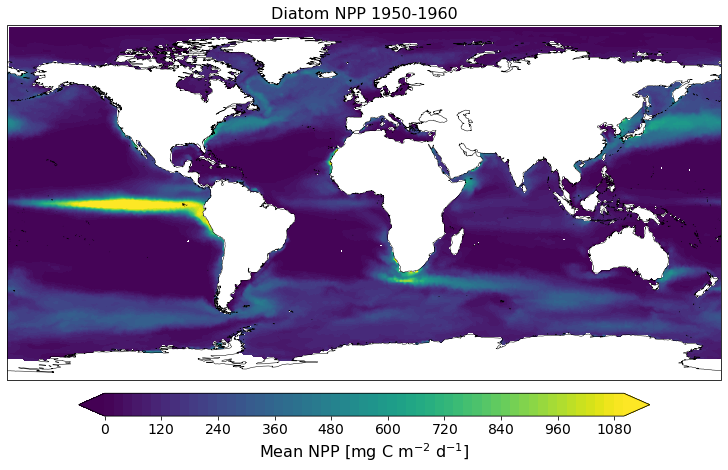

In [17]:
# map of total Diatom NPP 

NCfesom = resultpath + '/NPPd.fesom.1948.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

label='Diatom NPP {0}-{1}'.format(last_year-10,last_year)
units = 'Mean NPP [mg C m$^{-2}$ d$^{-1}$]'

NPPd = pf.get_data(resultpath, "NPPd", 
                   #years, 
                   [last_year-10,last_year],
                   mesh, runid=runid, how="mean", compute=True, silent=True)

#print(np.shape(NPPd))
# NPP is already vertically integrated!

NPPd = NPPd * 12.01
fig = pf.plot(mesh, NPPd, mapproj = mapproj, units=units, titles=label, 
              levels = (0,1100,56),
              cmap='viridis')

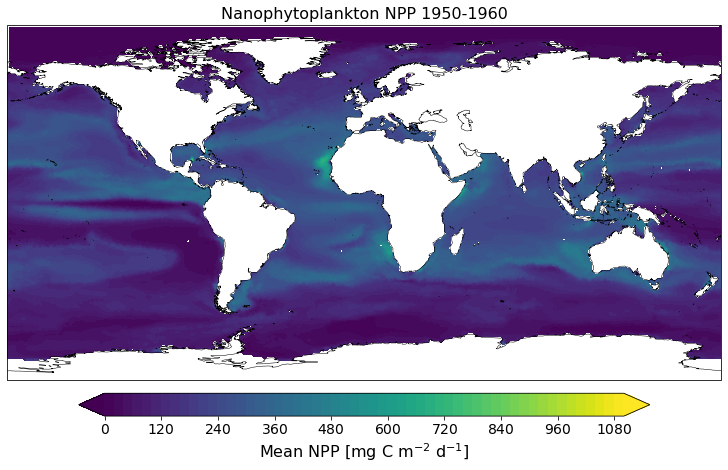

In [18]:
# map of nanophytoplankton NPP

NCfesom = resultpath + '/NPPn.fesom.1948.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mg C/m2/d

label='Nanophytoplankton NPP {0}-{1}'.format(last_year-10,last_year)
units = 'Mean NPP [mg C m$^{-2}$ d$^{-1}$]'

NPPn = pf.get_data(resultpath, "NPPn", 
                   #years, 
                   [last_year-10,last_year],
                   mesh, runid=runid, how="mean", compute=True,silent=True)

#print(np.shape(NPPn))
# NPP is already vertically integrated!

NPPn = NPPn *12.01

fig = pf.plot(mesh, NPPn, mapproj = mapproj, units=units, titles=label, 
              levels = (0,1100,56),
              cmap='viridis')

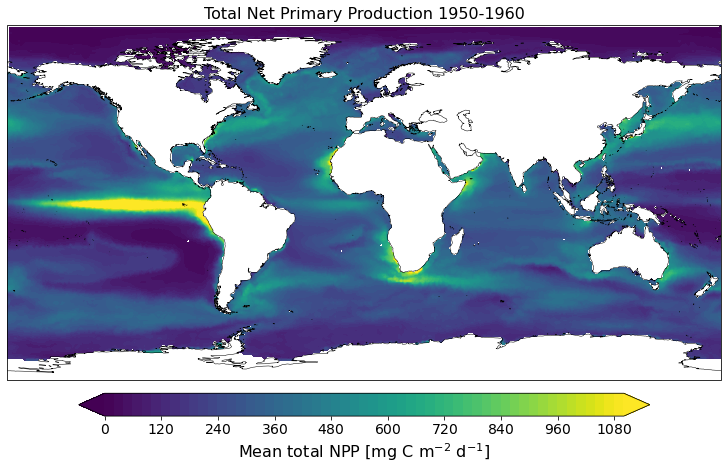

In [19]:
# total NPP
label='Total Net Primary Production {0}-{1}'.format(last_year-10,last_year)
units = 'Mean total NPP [mg C m$^{-2}$ d$^{-1}$]'

NPPtot = NPPd + NPPn
fig = pf.plot(mesh, NPPtot, mapproj = mapproj, units=units, titles=label, 
              levels = (0,1100,56),
              cmap='viridis')

# DIC

Model depth: 5.0


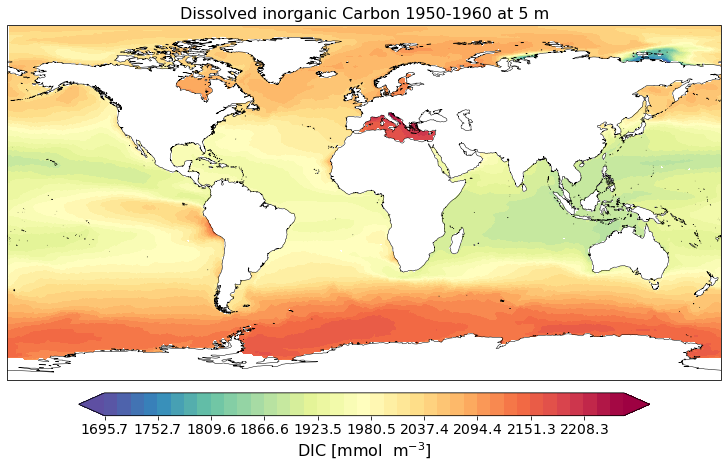

In [14]:
# DIC

NCfesom = resultpath + '/DIC.fesom.1948.nc'
#!ncdump -h $NCfesom

label='Dissolved inorganic Carbon {0}-{1} at {2} m'.format(years[0],years[1],depth)
units = 'DIC [mmol  m$^{-3}$]'
DIC = pf.get_data(resultpath, "DIC", years, mesh, runid=runid, how="mean", compute=True, depth=depth)
fig = pf.plot(mesh, DIC, mapproj = mapproj, units=units, titles=label)


# export to html

In [ ]:
%autosave 2

#time.sleep(15)

!jupyter nbconvert MASTER_Script_python3.ipynb --output-dir=$htmlpath --output $htmlname --to html 